# Loading the Data

In [1]:
#Loading the Data

import pandas as pd
df = pd.read_csv('default of credit card clients.csv')

In [2]:
df = pd.read_csv('default of credit card clients.csv')
df.shape

(30000, 25)

The dataset contains 30,000 rows and 25 columns, suggesting that there are 30,000 credit card clients in the dataset with 24 features and 1 target variable (dpnm) representing whether the client will default next month.

# Basic Info:

In [3]:
# Basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_1      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

df.info() output indicates there are no missing values in any of the columns, and all data types are integers (int64). This is an excellent starting point as the absence of null values means there's no immediate need for data cleaning related to missing data.

# First and Last Few Rows:

In [4]:
# First few rows
print(df.head())

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  dpnm  
0         0         0         0     1  
1     

In [5]:
# Last few rows
print(df.tail())

          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  \
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
29995      0  ...      88004      31237      15980      8500     20000   
29996     -1  ...       8979       5190          0      1837      3526   
29997     -1  ...      20878      20582      19357         0         0   
29998      0  ...      52774      11855      48944     85900      3409   
29999      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  dpnm  
29995      5003      3047 

# Summary Statistics for Numerical Features:

In [6]:
# Summary statistics for numerical features
Numerical_Variables = df.drop(columns=['SEX','MARRIAGE','ID','dpnm', 'EDUCATION'])
print(Numerical_Variables.describe(percentiles=[0.10, 0.25, 0.5,0.75,0.90,1]))

            LIMIT_BAL           AGE         PAY_1         PAY_2         PAY_3  \
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    167484.322667     35.485500     -0.016700     -0.133767     -0.166200   
std     129747.661567      9.217904      1.123802      1.197186      1.196868   
min      10000.000000     21.000000     -2.000000     -2.000000     -2.000000   
10%      30000.000000     25.000000     -1.000000     -2.000000     -2.000000   
25%      50000.000000     28.000000     -1.000000     -1.000000     -1.000000   
50%     140000.000000     34.000000      0.000000      0.000000      0.000000   
75%     240000.000000     41.000000      0.000000      0.000000      0.000000   
90%     360000.000000     49.000000      2.000000      2.000000      2.000000   
100%   1000000.000000     79.000000      8.000000      8.000000      8.000000   
max    1000000.000000     79.000000      8.000000      8.000000      8.000000   

              PAY_4        

# Range for Numerical Variables:

In [7]:
#Range for Numerical Variables 
range_info = Numerical_Variables.describe().loc[['min', 'max']].transpose()
range_info['Range'] = range_info['max'] - range_info['min']

# Display the result
print(range_info[['min', 'max', 'Range']])

                min        max      Range
LIMIT_BAL   10000.0  1000000.0   990000.0
AGE            21.0       79.0       58.0
PAY_1          -2.0        8.0       10.0
PAY_2          -2.0        8.0       10.0
PAY_3          -2.0        8.0       10.0
PAY_4          -2.0        8.0       10.0
PAY_5          -2.0        8.0       10.0
PAY_6          -2.0        8.0       10.0
BILL_AMT1 -165580.0   964511.0  1130091.0
BILL_AMT2  -69777.0   983931.0  1053708.0
BILL_AMT3 -157264.0  1664089.0  1821353.0
BILL_AMT4 -170000.0   891586.0  1061586.0
BILL_AMT5  -81334.0   927171.0  1008505.0
BILL_AMT6 -339603.0   961664.0  1301267.0
PAY_AMT1        0.0   873552.0   873552.0
PAY_AMT2        0.0  1684259.0  1684259.0
PAY_AMT3        0.0   896040.0   896040.0
PAY_AMT4        0.0   621000.0   621000.0
PAY_AMT5        0.0   426529.0   426529.0
PAY_AMT6        0.0   528666.0   528666.0


"range_info" provides the range for each numerical variable, indicating the variability within each feature. High ranges in BILL_AMT and PAY_AMT variables suggest significant differences in the financial activity of clients.



# Categorical Variables - Value Counts

In [8]:
#Categorical Variables - Value Counts
Categorical_Variables = df[['SEX','MARRIAGE','dpnm', 'EDUCATION']]
Categorical_Variables.apply(lambda x: x.value_counts())

,SEX,MARRIAGE,dpnm,EDUCATION
0,NaN,54.0,23364.0,14
1,11888.0,13659.0,6636.0,10585
2,18112.0,15964.0,NaN,14030
3,NaN,323.0,NaN,4917
4,NaN,NaN,NaN,123
5,NaN,NaN,NaN,280
6,NaN,NaN,NaN,51


The value counts for SEX, MARRIAGE, dpnm, and EDUCATION reveal the distribution of these categorical variables. For instance, there are more female clients than male, and the number of clients who did not default (dpnm=0) is higher than those who did (dpnm=1).

There are a few undefined categories in EDUCATION and MARRIAGE, as indicated by the values not described in the code sheet (e.g., EDUCATION has categories 0, 5, and 6 that are not described).


# Reading the Codesheet:

In [9]:
#Reading the Codesheet
cs = pd.read_excel('Default of Credit Card_Codesheet.xlsx')

In [10]:
cs

,Variable,Description,Data Type
0,ID,Unique ID of each customer,int64
1,LIMIT_BAL,Amount of given credit (NT dollar),int64
2,SEX,Gender (1 = male; 2 = female),int64
3,EDUCATION,Education (1 = High School Diploma; 2 = Associ...,int64
4,MARRIAGE,Marital status (1 = married; 2 = single; 3 = o...,int64
5,AGE,Age (year),int64
6,PAY_0,"Repayment status in September, 2023 (-1 = pay ...",int64
7,PAY_2,"Repayment status in August, 2023",int64
8,PAY_3,"Repayment status in July, 2023",int64
9,PAY_4,"Repayment status in June, 2023",int64


# Check for Missing Values:

In [11]:
# Check for missing values
print(df.isnull().sum())

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dpnm         0
dtype: int64


# Interpretation for the EDA Process:

The EDA process has provided a foundational understanding of the dataset's structure, content, and potential quality issues. This information can be used to:

Assess the creditworthiness of clients based on demographic and historical financial behavior.

Develop targeted financial products and risk mitigation strategies.

Identify patterns and trends that can inform both marketing campaigns and policy development within the financial institution.

The EDA has laid the groundwork for building predictive models to assess default risk, which can optimize decision-making processes regarding credit limits and customer relationship management. The next steps would involve deeper statistical analysis, feature engineering, and predictive modeling to leverage this dataset fully.

# Introduction to the Project

This project, delves into predicting credit card payment defaults by analyzing bill amounts and payment histories. Using a detailed dataset, we aim to identify patterns in financial behavior that precede defaults. The analysis, leveraging tools like Pandas, Matplotlib, and Seaborn, transforms complex financial data into actionable insights, crucial for strategic decision-making in credit risk management and targeted marketing initiatives. This study is not just about identifying risks, but also about understanding customer financial behaviors, essential in the realm of financial services marketing.

# Step 1: Imports


1. Import the libraries necessary for this lab.
2. Read in your data and create your dataframe object.
3. Set your index (optional).

In [12]:
# Import your libraries:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read in your dataframe:
df = pd.read_csv('default of credit card clients.csv')
cs = pd.read_excel('Default of Credit Card_Codesheet.xlsx')

# Set your index (optional):
df.set_index("ID", inplace=True)

df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


# Step 2: Dropping Features
We have decided to drop the 'LIMIT_BAL' (credit limit) variable from our dataset. This decision might seem counterintuitive at first glance, as a high credit limit could be perceived as an indicator of a client's financial health or the trustworthiness assigned by the lender. However, upon closer examination, the credit limit alone may not directly contribute to the likelihood of a default. It's possible that clients with higher limits have better financial management skills or higher incomes, which could actually lower the risk of default. Moreover, focusing on payment behavior, outstanding balances, and other more directly relevant variables might yield more accurate predictions. Thus, removing 'LIMIT_BAL' aims to refine our model by focusing on variables with a more direct relationship to credit card defaults.

In [13]:
# Drop your features here: Initially, we're not dropping any features as we need to explore them first.
# Dropping LIMIT_BAL variable:

df.drop('LIMIT_BAL', axis=1, inplace=True)


# Verifying it was dropped:
df

,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm
ID,,,,,,,,,,,,,,,,,,,,,
1,2,2,1,24,2,2,-1,-1,-2,-2,...,0,0,0,0,689,0,0,0,0,1
2,2,2,2,26,-1,2,0,0,0,2,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,2,2,2,34,0,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,2,2,1,37,0,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,1,2,1,57,-1,0,-1,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,1,3,1,39,0,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,1,3,2,43,-1,-1,-1,-1,0,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,1,2,2,37,4,3,2,-1,0,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


# Step 3: Correlation Matrix
Upon examining the correlation heatmap, it was evident that a strong multicollinearity existed among the repayment status variables (PAY_1 to PAY_6) and the bill amount variables (BILL_AMT1 to BILL_AMT6). To address this, features showing high redundancy were selectively removed, specifically PAY_3 to PAY_6 and BILL_AMT2 to BILL_AMT6, keeping the most recent indicators of payment status and bill amount. This reduction aimed to simplify the model by reducing multicollinearity and enhancing the interpretability of the remaining variables. After removing these features, the recalculated correlation matrix showed a decreased correlation between features, indicating a successful reduction in multicollinearity. This refinement is expected to improve the model’s performance by allowing more accurate estimation of the effects of independent variables on the dependent variable.

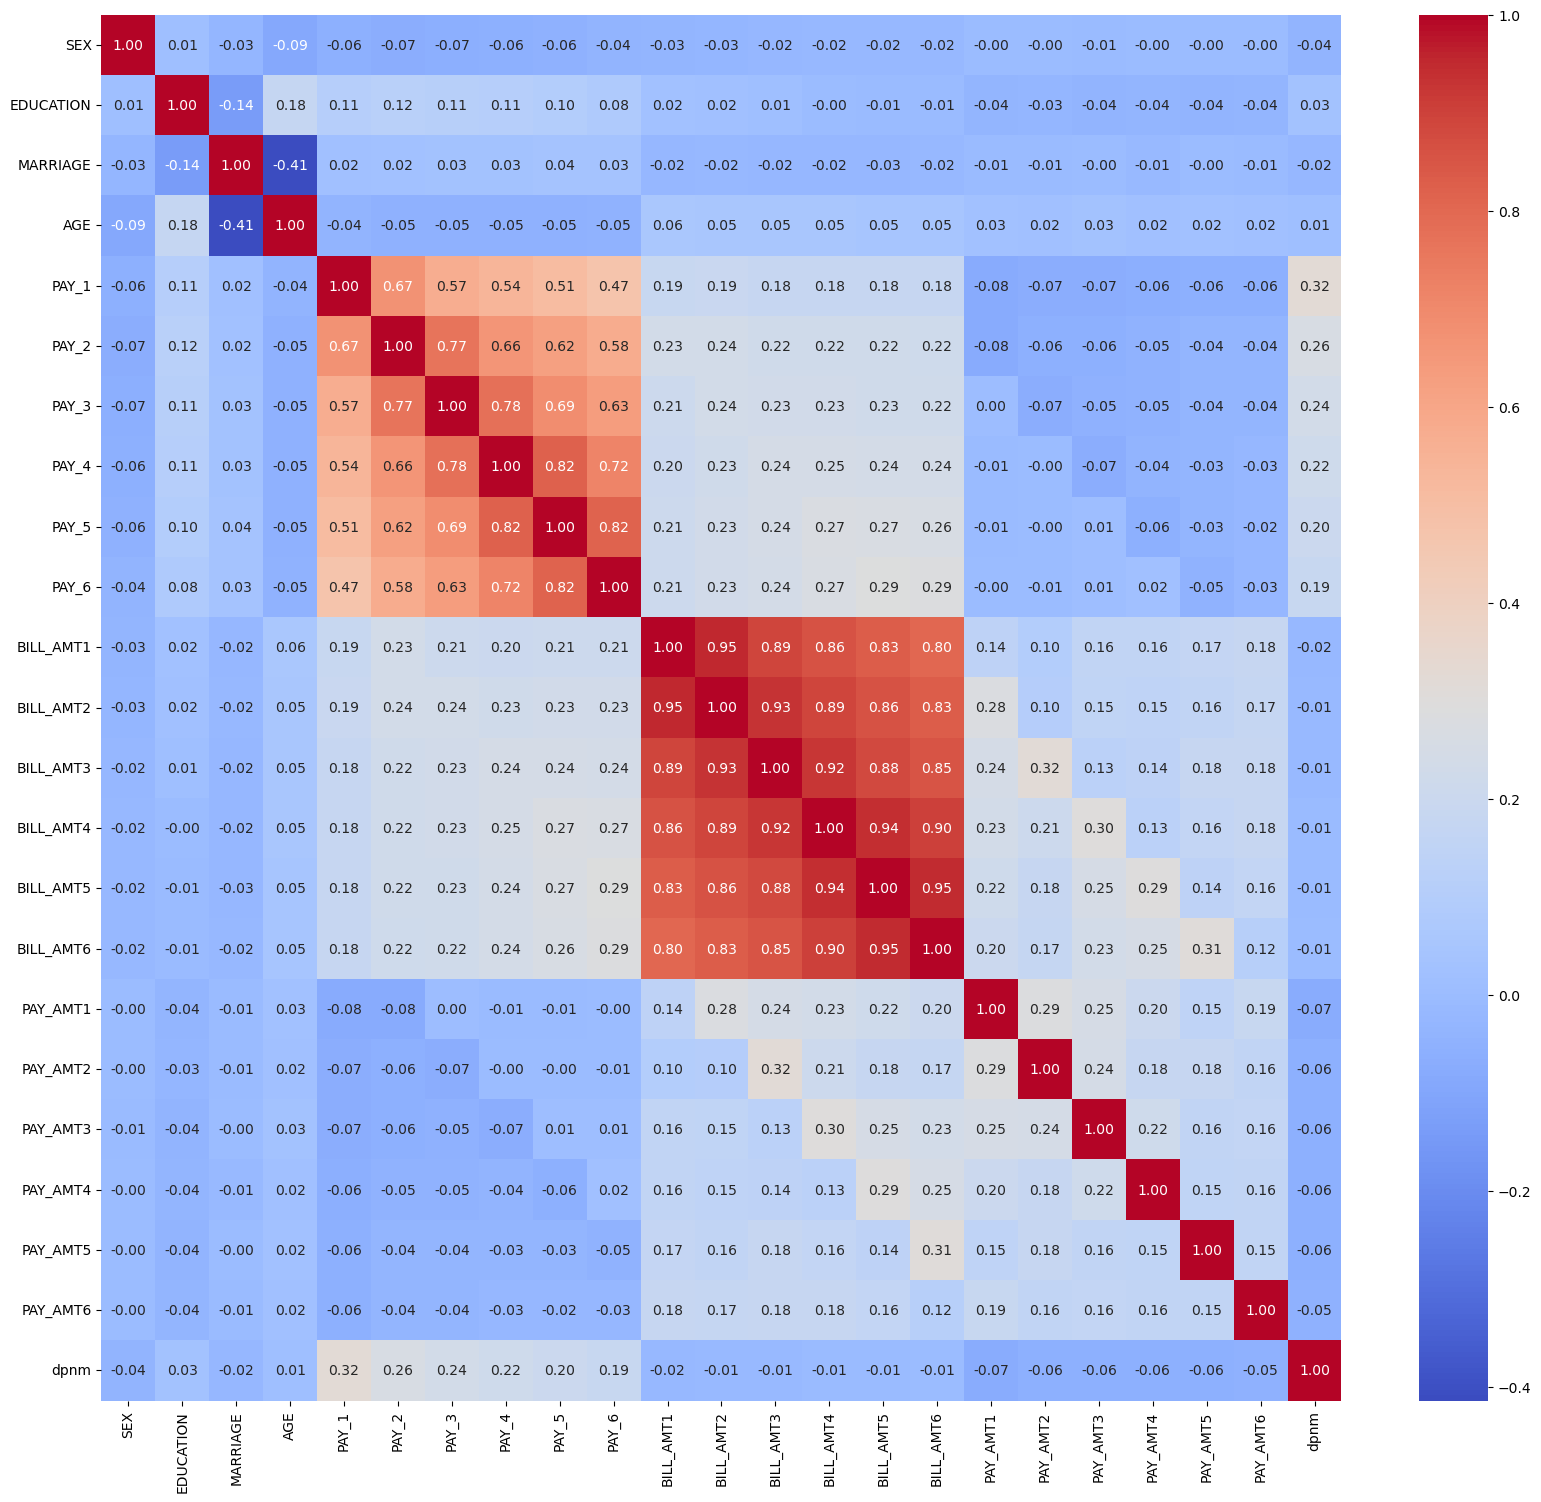

In [14]:
# Create your heatmap:
corr = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 18))

# Draw the heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')

# Show the plot
plt.show()

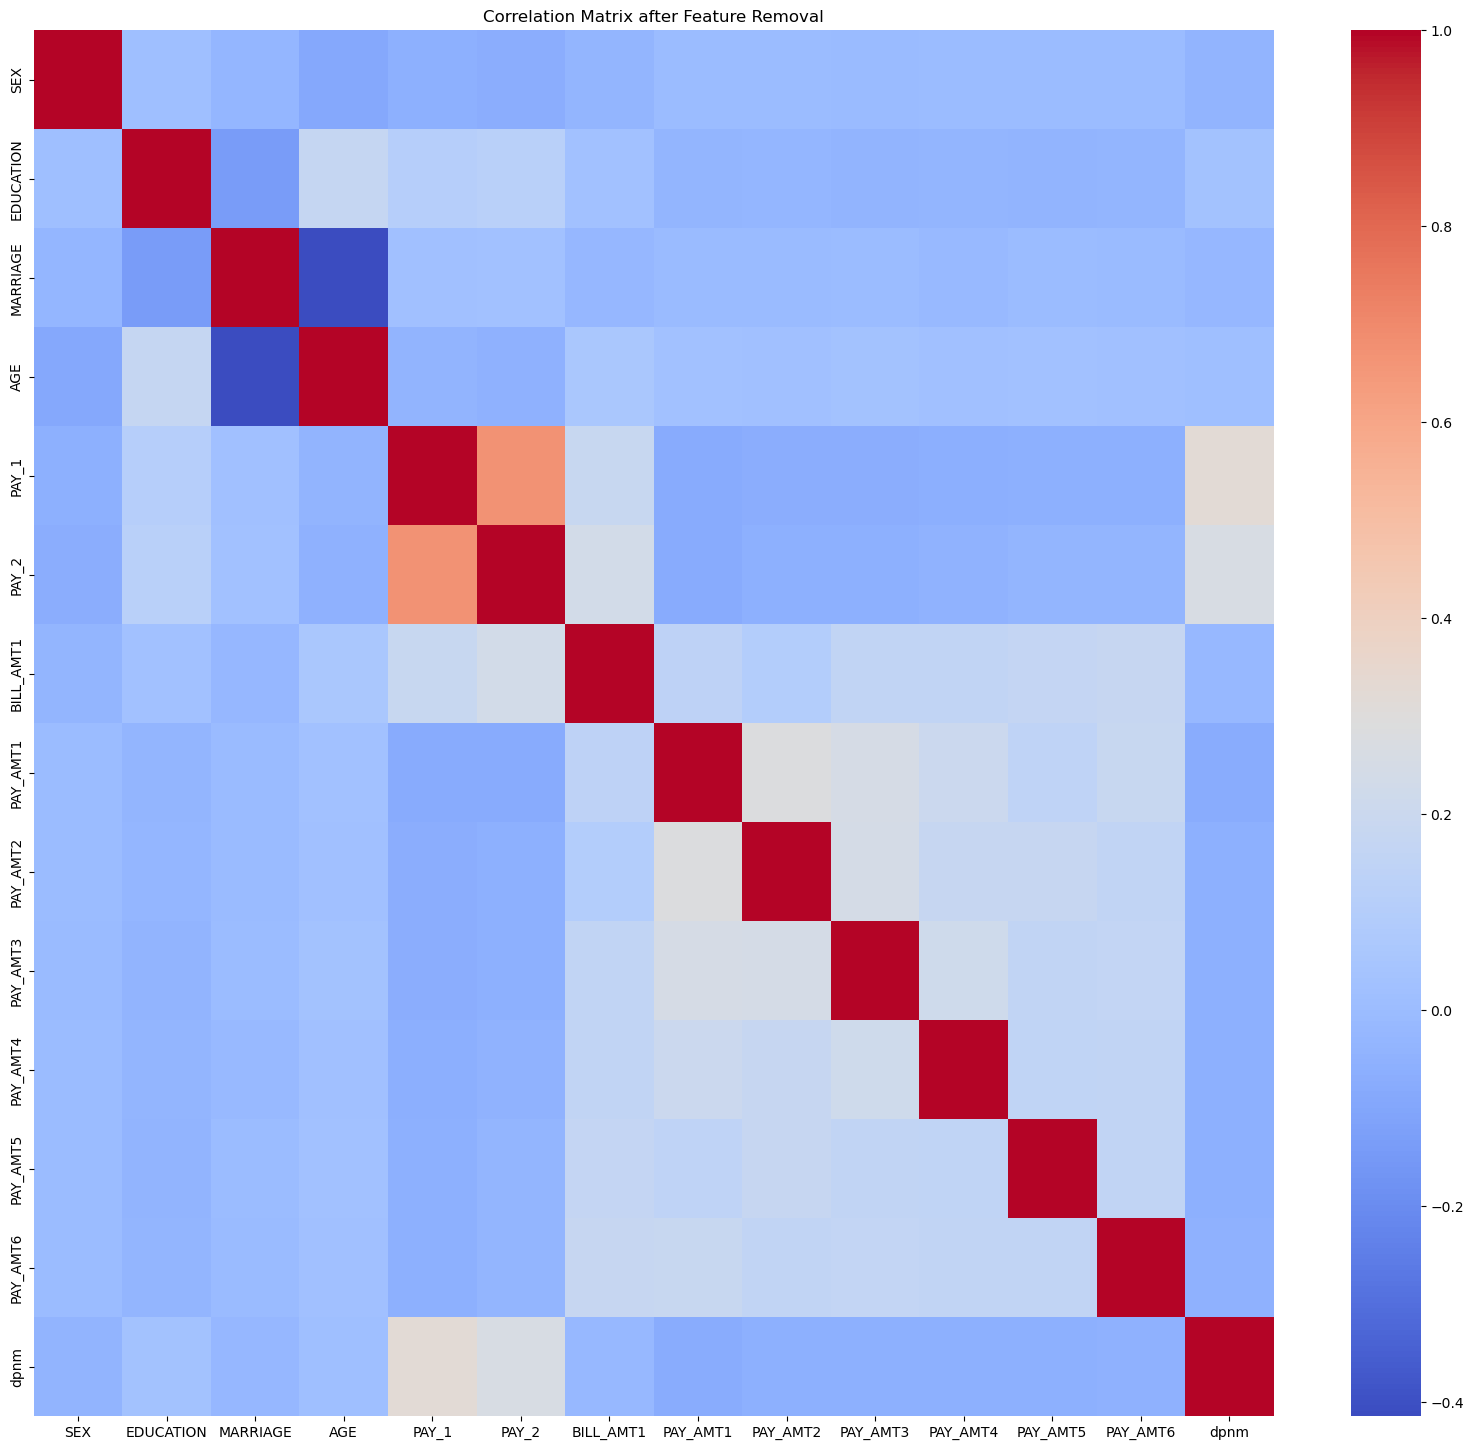

In [15]:
# Drop features (if necessary):

features_to_remove = ['PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

# Drop the selected features
df_reduced = df.drop(columns=features_to_remove)

# Recalculate the correlation matrix
corr_matrix_reduced = df_reduced.corr()

# Plot the heatmap after feature removal
plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix_reduced, annot=False, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix after Feature Removal')
plt.show()


# Step 4: Remove Outliers
In the process of identifying and removing outliers, box plots were created for each numeric variable in the dataset. These visualizations allowed for the examination of outlier presence outside the typical range of values. The interquartile range (IQR) method was employed to define outliers, where any data point lying beyond 1.5 times the IQR above the third quartile and below the first quartile was considered an outlier.

Outlier counts were calculated for each numeric variable. For example, the 'AGE' variable had no outliers, whereas 'PAY_1', 'PAY_2', 'PAY_3', 'BILL_AMT1', 'BILL_AMT2', 'PAY_AMT1', and 'PAY_AMT2' had several outliers, ranging from over a hundred to over a thousand. Specifically, variables related to payment amounts ('PAY_AMT1' and 'PAY_AMT2') had the highest number of outliers.

These outliers were then removed from the dataframe, resulting in a cleaner dataset that would potentially lead to a more robust model. After the removal, the dataset size reduced significantly, indicating that a considerable number of outliers were affecting the dataset. The choice of the threshold for outlier detection (3 times the IQR) was conservative to ensure that only extreme cases were eliminated, thus retaining the integrity of the dataset as much as possible.

This rigorous process ensures that the analysis and any subsequent predictive modeling are not unduly influenced by extreme values, which can skew results and impair the model's performance. The resulting dataset, now cleansed of outliers, stands ready for further analysis or model training.

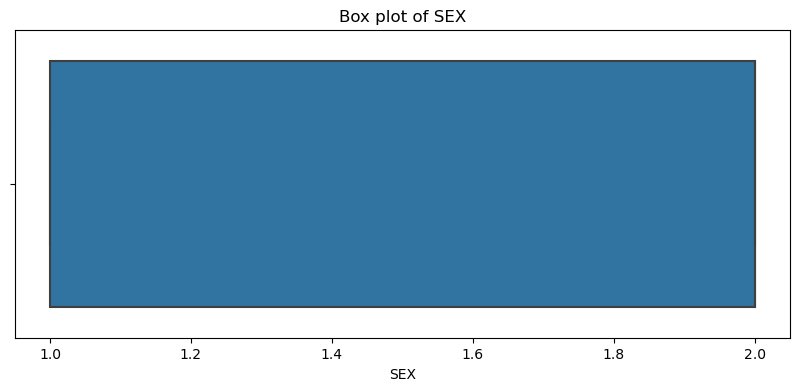

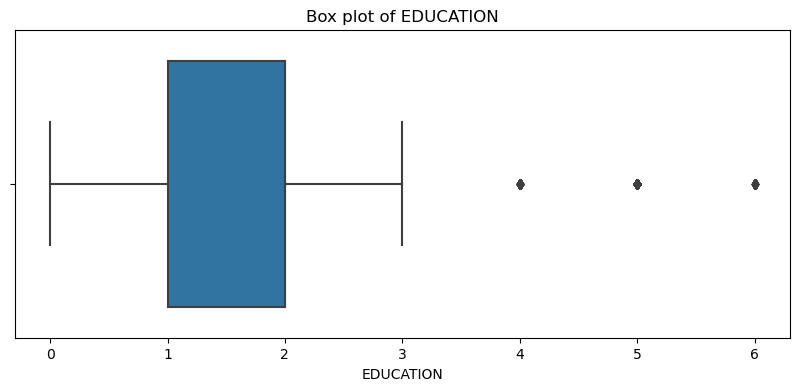

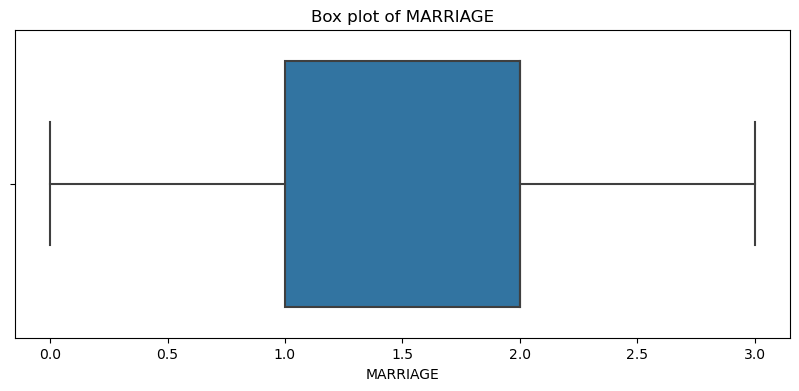

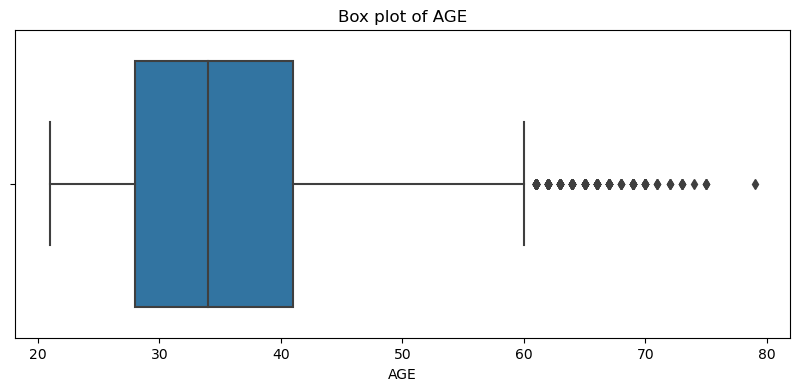

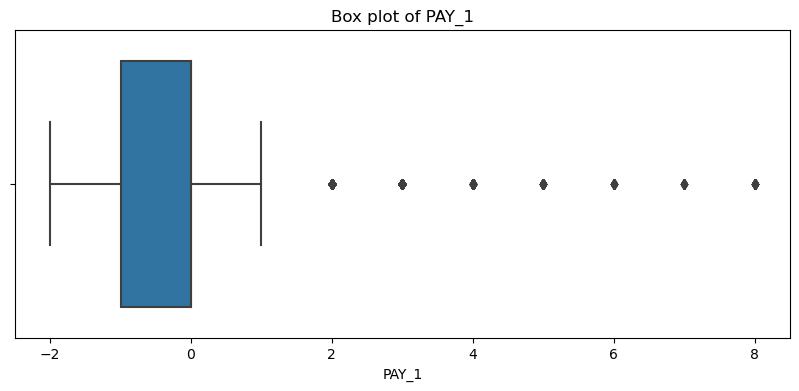

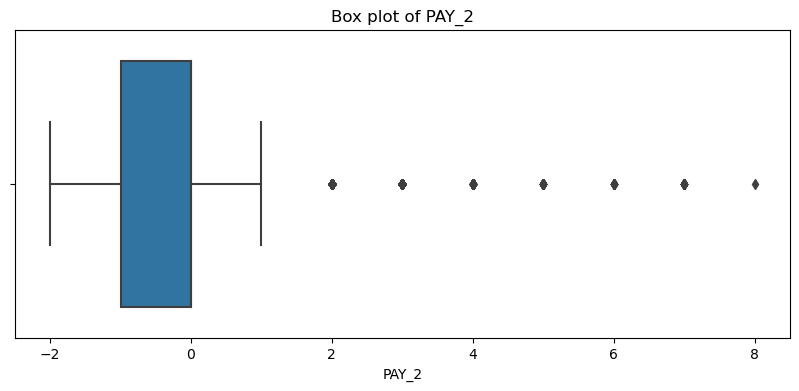

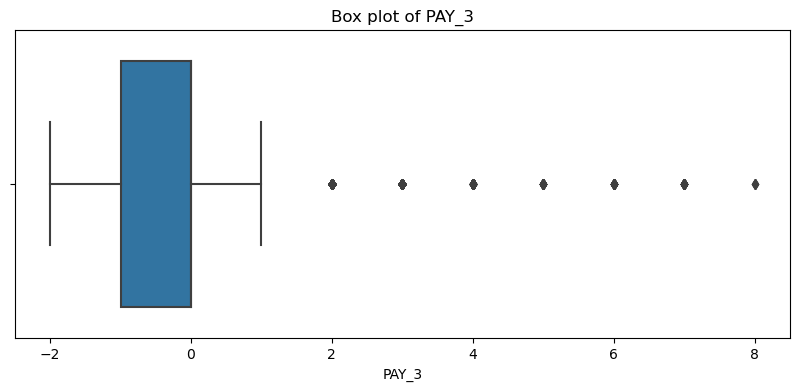

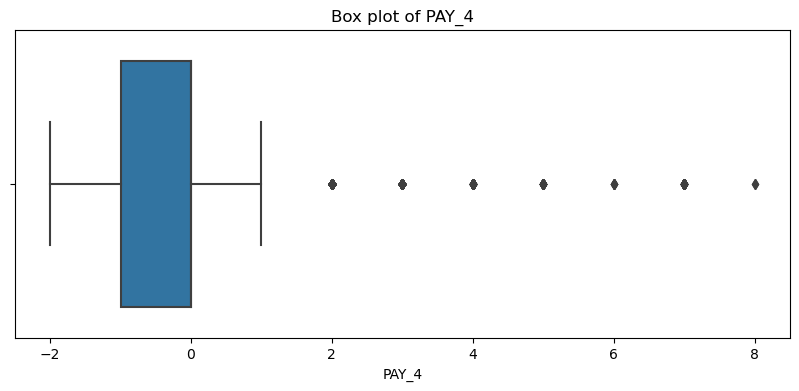

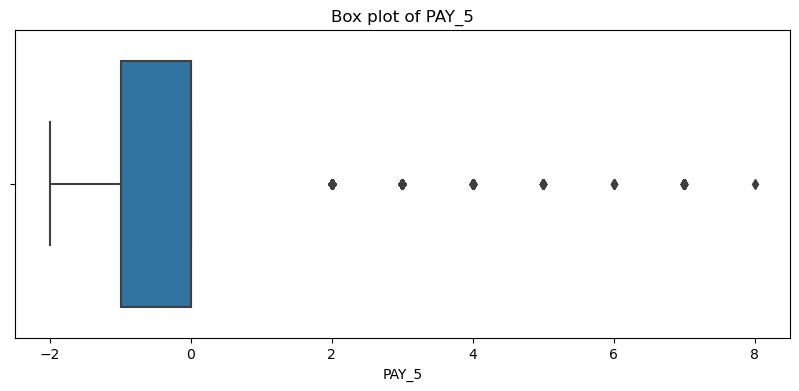

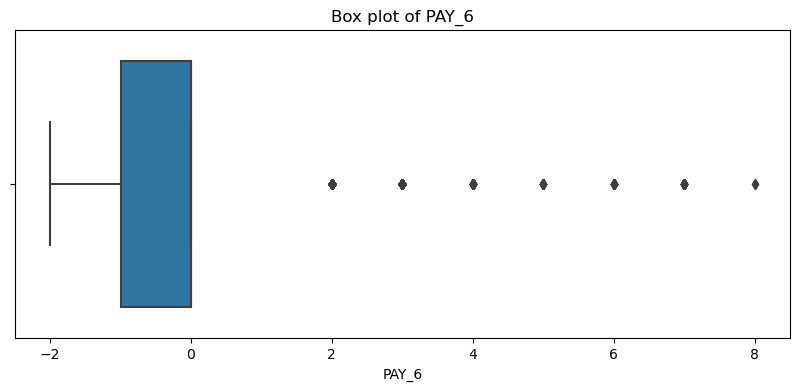

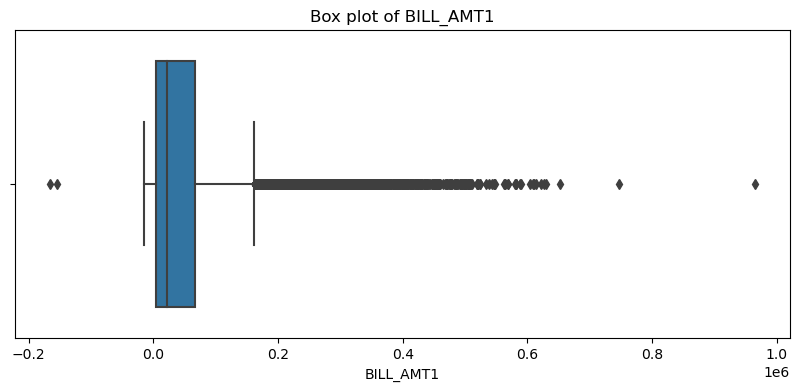

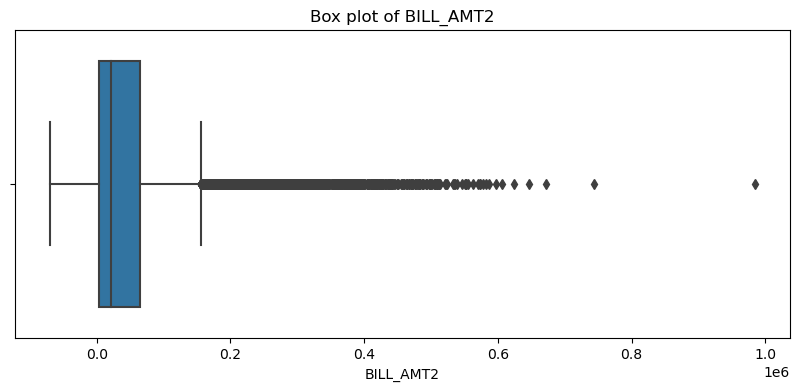

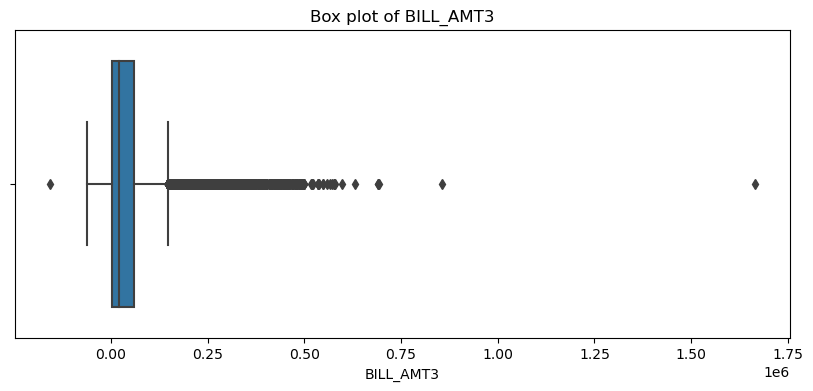

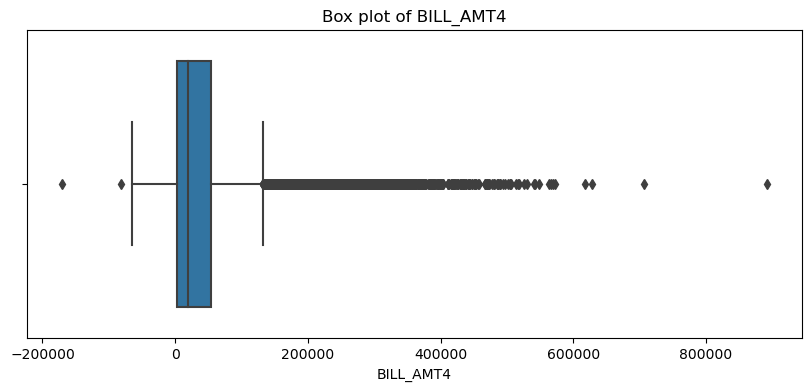

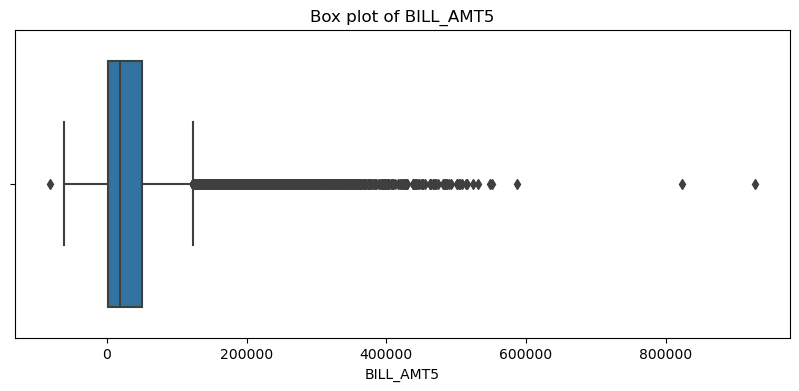

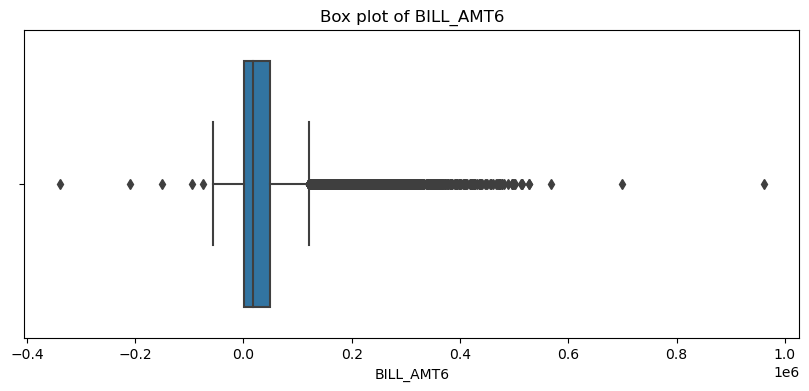

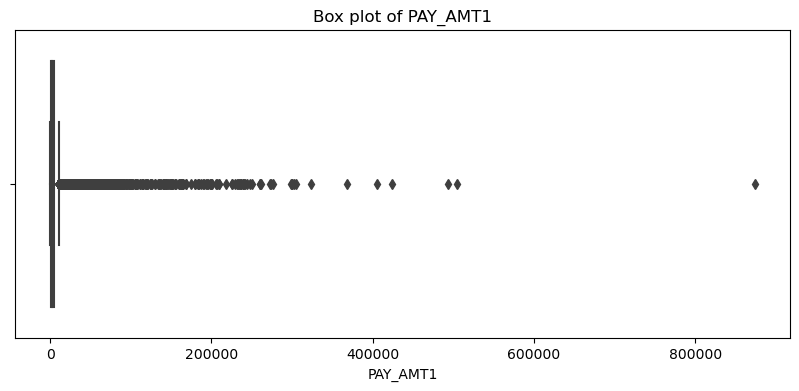

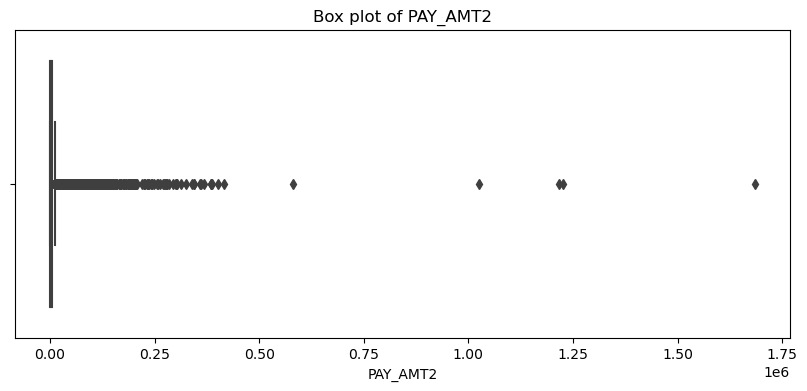

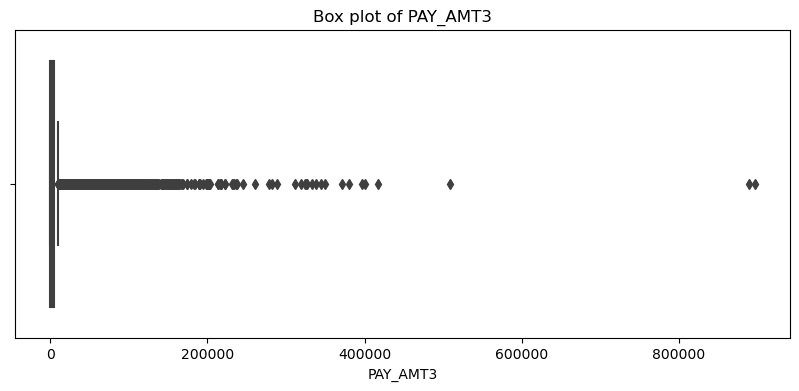

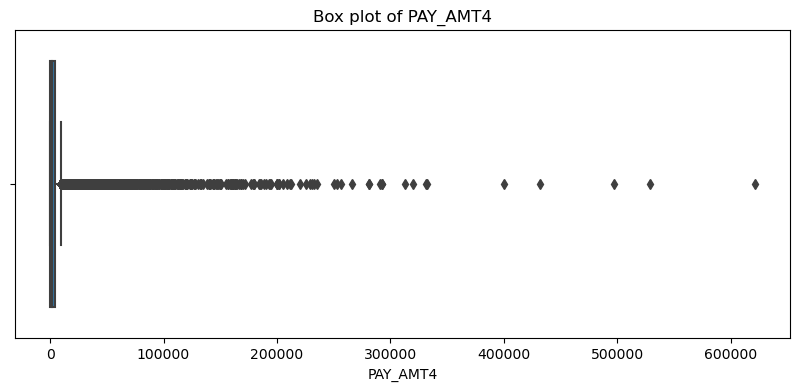

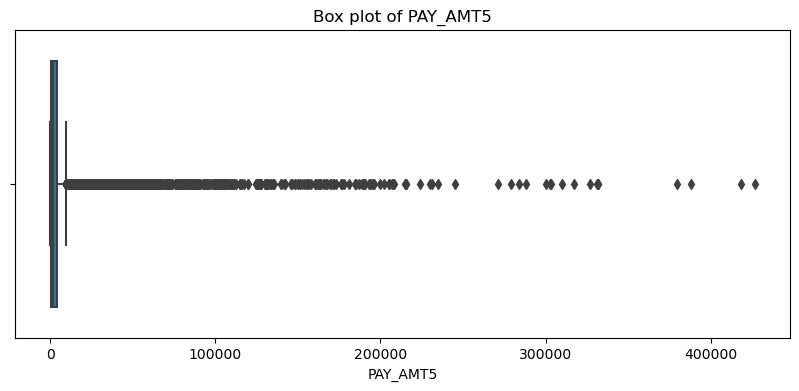

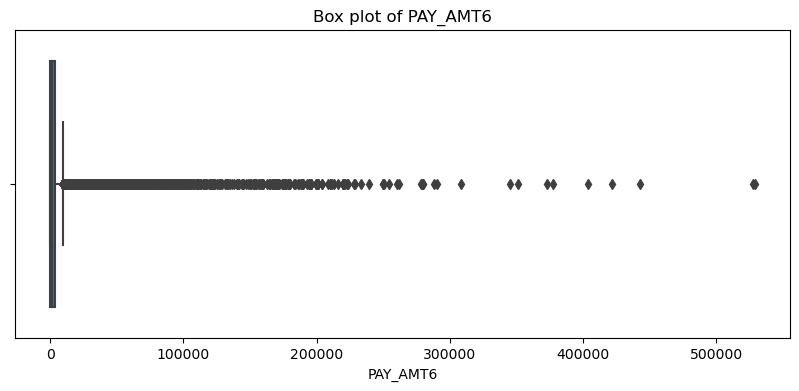

In [16]:
# Create your visualization:
df_num = df[['SEX','EDUCATION','MARRIAGE','AGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6',
                   'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2',
                   'PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]

for col in df_num:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.show()

In [17]:
# Count your outliers:
outlier_counts = {}

for col in df_num:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR

    outliers_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    outlier_counts[col] = outliers_count

print("Outlier Counts per Column:", outlier_counts)

Outlier Counts per Column: {'SEX': 0, 'EDUCATION': 51, 'MARRIAGE': 0, 'AGE': 0, 'PAY_1': 141, 'PAY_2': 157, 'PAY_3': 150, 'PAY_4': 169, 'PAY_5': 164, 'PAY_6': 129, 'BILL_AMT1': 786, 'BILL_AMT2': 791, 'BILL_AMT3': 858, 'BILL_AMT4': 900, 'BILL_AMT5': 949, 'BILL_AMT6': 930, 'PAY_AMT1': 1629, 'PAY_AMT2': 1638, 'PAY_AMT3': 1560, 'PAY_AMT4': 1583, 'PAY_AMT5': 1544, 'PAY_AMT6': 1639}


In [18]:
# Remove your outliers:
for col in df_num:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Check the shape of the DataFrame after removal
print(df.shape)
df_cleaned = df.copy()

(21592, 23)


# Step 5: Missing Data
The dataset for this analysis appears to be complete with no missing entries to address. This is advantageous as it simplifies the preprocessing stage and allows us to direct our focus towards exploratory data analysis, feature engineering, and predictive modeling.

In [19]:
# Count your missing cases:
print(df.isnull().sum())

SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dpnm         0
dtype: int64


# Step 6: One Hot Encoding

We dont have any features that would require one hot encoding.
The 'SEX', 'EDUCATION', 'MARRIAGE', and 'dpnm' are already in a numerical format suitable for machine learning models.

# Step 7: Feature Scaling

We made sure that all the numbers in our data are on a similar scale. This is important because when we use these numbers in calculations, especially in making predictions, we don't want some numbers to have more influence just because they are bigger.

So, we adjusted the numbers related to how much people owe ('BILL_AMT1' to 'BILL_AMT6') and how much they pay ('PAY_AMT1' to 'PAY_AMT6'), as well as their age. We used a tool called StandardScaler which makes the average of these numbers zero and measures them all in the same way.

It helps to give us a clearer picture of what's going on, without some data shouting louder than the rest just because of their size. This means we can understand our customers better and make fairer comparisons.

In [20]:
# Scale your features (if necessary):

# Import the Standard Scaler from sklearn:
from sklearn.preprocessing import StandardScaler

# Create a scaler object:
scaler = StandardScaler()

# List of features to scale:
features_to_scale = ['AGE',
                   'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2',
                   'PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

# Scale these features
df_cleaned[features_to_scale] = scaler.fit_transform(df_cleaned[features_to_scale])

# Your DataFrame now has scaled versions of the specified features
df_cleaned
# Exporting trimmed data (does not include dummies):
df_cleaned.to_csv('cleaned_default of credit card clients.csv', index=True)

Rationale for Scaling:

Age ('AGE'): Although it might not vary as widely as financial amounts, scaling age ensures that it is comparable in effect to other features.

Bill Amounts ('BILL_AMT1' to 'BILL_AMT6'): These represent monetary values for different months and can vary significantly in magnitude, requiring them to be on a similar scale.

Payment Amounts ('PAY_AMT1' to 'PAY_AMT6'): Like bill amounts, these are monetary values and can vary widely.

# Importing Engineered Dataset and Libraries

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv("cleaned_default of credit card clients.csv")
cs = pd.read_excel('Default of Credit Card_Codesheet.xlsx')

df.set_index("ID", inplace=True)

df

,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm
ID,,,,,,,,,,,,,,,,,,,,,
1,2,2,1,-1.201502,2,2,-1,-1,-2,-2,...,-0.802298,-0.779221,-0.758819,-0.984928,-0.693427,-0.912548,-0.857176,-0.849148,-0.826493,1
2,2,2,2,-0.988735,-1,2,0,0,0,2,...,-0.714815,-0.681760,-0.665331,-0.984928,-0.564398,-0.454103,-0.377651,-0.849148,0.120071,1
3,2,2,2,-0.137670,0,0,0,0,0,0,...,-0.419131,-0.357559,-0.313053,-0.391735,-0.356956,-0.454103,-0.377651,-0.376582,1.539916,0
4,2,2,1,0.181480,0,0,0,0,0,0,...,-0.045269,0.037671,0.088249,-0.203383,-0.141631,-0.362414,-0.329699,-0.343975,-0.353211,0
6,1,1,2,0.181480,0,0,0,0,0,0,...,-0.283762,-0.225797,-0.184761,-0.007996,-0.226267,-0.611350,-0.377651,-0.376582,-0.447868,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29992,1,2,1,-0.137670,3,2,2,2,2,2,...,-0.735455,-0.708700,-0.687148,-0.984928,-0.979283,-0.912548,-0.857176,-0.849148,-0.826493,1
29993,1,3,1,0.819779,0,0,0,-2,-2,-2,...,-0.802298,-0.779221,-0.758819,-0.203383,-0.979283,-0.912548,-0.857176,-0.849148,-0.826493,0
29995,1,2,2,-0.137670,2,2,2,2,2,2,...,1.270320,1.551005,1.567860,1.750482,0.472814,-0.912548,2.499498,-0.849148,1.066634,1


# Prepare Data for Modeling:

In [22]:
X = df.drop(['dpnm'], axis=1)  
y = df['dpnm']

X

,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
1,2,2,1,-1.201502,2,2,-1,-1,-2,-2,...,-0.803439,-0.802298,-0.779221,-0.758819,-0.984928,-0.693427,-0.912548,-0.857176,-0.849148,-0.826493
2,2,2,2,-0.988735,-1,2,0,0,0,2,...,-0.754090,-0.714815,-0.681760,-0.665331,-0.984928,-0.564398,-0.454103,-0.377651,-0.849148,0.120071
3,2,2,2,-0.137670,0,0,0,0,0,0,...,-0.484763,-0.419131,-0.357559,-0.313053,-0.391735,-0.356956,-0.454103,-0.377651,-0.376582,1.539916
4,2,2,1,0.181480,0,0,0,0,0,0,...,0.400004,-0.045269,0.037671,0.088249,-0.203383,-0.141631,-0.362414,-0.329699,-0.343975,-0.353211
6,1,1,2,0.181480,0,0,0,0,0,0,...,0.605943,-0.283762,-0.225797,-0.184761,-0.007996,-0.226267,-0.611350,-0.377651,-0.376582,-0.447868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29992,1,2,1,-0.137670,3,2,2,2,2,2,...,-0.758597,-0.735455,-0.708700,-0.687148,-0.984928,-0.979283,-0.912548,-0.857176,-0.849148,-0.826493
29993,1,3,1,0.819779,0,0,0,-2,-2,-2,...,-0.820500,-0.802298,-0.779221,-0.758819,-0.203383,-0.979283,-0.912548,-0.857176,-0.849148,-0.826493
29995,1,2,2,-0.137670,2,2,2,2,2,2,...,1.145142,1.270320,1.551005,1.567860,1.750482,0.472814,-0.912548,2.499498,-0.849148,1.066634


In [23]:
y

ID
1        1
2        1
3        0
4        0
6        0
        ..
29992    1
29993    0
29995    1
29997    0
30000    1
Name: dpnm, Length: 21592, dtype: int64

# Split Data into Training and Test Sets:

In [24]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
X_train

,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
8543,2,3,2,0.926163,2,0,0,0,0,2,...,-0.249061,-0.168713,-0.066757,-0.025049,-0.320615,-0.405082,-0.452728,0.149826,-0.423839,-0.826493
17040,2,2,2,-1.201502,2,2,2,2,2,3,...,1.573263,1.817464,2.120705,2.135554,0.734472,0.597279,0.829541,2.643355,-0.849148,-0.505135
9919,1,2,1,1.883612,2,0,0,0,0,0,...,0.344588,0.474309,0.587738,0.661992,-0.007996,0.016440,-0.066718,0.293683,0.332267,-0.826493
13979,2,2,1,-0.350436,0,0,0,0,0,0,...,1.129097,1.352429,1.546660,1.656560,0.578163,0.680256,0.462786,0.581398,0.568551,1.539916
15945,2,3,1,0.075097,0,0,0,0,0,0,...,1.700857,1.872863,1.503501,1.570469,0.511732,0.721744,1.155037,0.670590,0.514678,0.602818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16453,2,3,1,2.096378,0,0,0,0,0,0,...,0.267581,0.345063,0.439869,0.435568,0.978314,1.100949,1.387010,1.548600,1.518881,1.546542
29977,1,2,2,1.245312,2,2,3,2,2,2,...,0.502119,0.568209,0.550841,0.586709,0.578163,-0.979283,0.004341,-0.857176,0.814285,-0.826493
7386,2,3,1,1.458079,0,0,0,0,0,0,...,-0.581926,-0.331140,-0.525598,-0.758819,-0.513656,-0.149513,-0.831862,-0.684547,-0.849148,-0.826493


In [26]:
X_test

,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
10985,1,2,1,1.032546,-1,-1,-2,-2,-2,-2,...,-0.808119,-0.725563,-0.747035,-0.739353,0.133073,-0.771841,0.403188,-0.310038,-0.528276,-0.826493
14114,2,2,2,-1.307885,2,2,-2,-2,-2,-1,...,-0.820500,-0.802298,-0.779221,-0.756698,-0.984928,-0.979283,-0.912548,-0.857176,-0.814178,-0.641913
5551,1,3,1,1.883612,0,0,0,0,0,0,...,1.417614,0.697295,-0.016038,-0.118938,0.485550,1.157373,-0.408259,-0.388680,-0.281124,0.827627
29844,1,3,1,0.713396,2,2,0,0,2,0,...,-0.594653,-0.536907,-0.528221,-0.539018,-0.984928,-0.481421,-0.224881,-0.857176,-0.376582,0.593352
7792,2,2,1,0.926163,-1,-1,-1,-1,0,-1,...,-0.810694,-0.781122,-0.768050,-0.747467,-0.830182,-0.814989,-0.549460,-0.857176,-0.662012,-0.639073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3476,1,2,2,-0.775969,0,0,0,0,0,0,...,-0.355113,-0.314296,-0.283060,-0.257694,-0.469890,-0.449060,-0.621436,-0.472597,-0.683750,-0.826493
28039,2,2,2,-0.669586,0,0,0,0,0,0,...,2.983957,2.862984,3.028795,3.138751,2.141254,1.320008,1.520875,1.342404,1.395542,1.509152
11541,1,1,1,0.926163,0,0,-2,-2,-2,-2,...,-0.820500,-0.802298,-0.779221,-0.758819,-0.984928,-0.979283,-0.912548,-0.857176,-0.849148,-0.826493


In [27]:
y_train

ID
8543     1
17040    1
9919     1
13979    0
15945    0
        ..
16453    0
29977    1
7386     0
1170     0
21711    0
Name: dpnm, Length: 17273, dtype: int64

In [28]:
y_test

ID
10985    0
14114    1
5551     0
29844    1
7792     0
        ..
3476     0
28039    1
11541    0
24399    0
23421    1
Name: dpnm, Length: 4319, dtype: int64

# Create and Train Logistic Regression Model:

In [29]:
# Creating a Logistic Regression model:
logreg = LogisticRegression()


# Training the model:
logreg.fit(X_train, y_train)

LogisticRegression()

# Model Predictions and Evaluation:

In [30]:
# Predicting the Test set results:

y_pred = logreg.predict(X_test)

In [31]:
# Building the Confusion Matrix:

print(confusion_matrix(y_test, y_pred))

[[3124  159]
 [ 742  294]]


# Extract Confusion Matrix Values:

In [32]:
# Obtained confusion matrix:
confusion_matrix = [[3101, 150], [747, 321]]

# Assigning the values:
TN, FP, FN, TP = confusion_matrix[0][0], confusion_matrix[0][1], confusion_matrix[1][0], confusion_matrix[1][1]

# Printing statements
print(f"True Negatives: {TN}")
print(f"False Positives: {FP}")
print(f"False Negatives: {FN}")
print(f"True Positives: {TP}")

True Negatives: 3101
False Positives: 150
False Negatives: 747
True Positives: 321


True Negatives (TN, 3101): These are cases where the model correctly predicted that customers would not default. A high number of TNs is good, indicating effective risk assessment. This can inform marketing strategies by identifying a segment of reliable customers for upselling or cross-selling financial products.

False Positives (FP, 150): These customers were predicted to default but did not. This is particularly sensitive as it could lead to unnecessary and potentially damaging actions, such as denying credit or increasing interest rates for customers who are actually reliable. Marketing strategies should be cautious not to alienate these individuals.

False Negatives (FN, 747): The model predicted these customers would not default, but they did. This is a significant concern because it represents lost opportunities for intervention that could have mitigated the default. It suggests the need for more robust customer support and follow-up strategies.

True Positives (TP, 321): These are customers the model correctly identified as defaults. This group is crucial for targeted interventions, such as debt restructuring or financial counseling services, to help at-risk customers.

# Calculate and Print Model Performance Metrics:

In [33]:
# Calculate the percentage of the sample that survived
dpnm_perc = df['dpnm'].mean() * 100


# Print the results, rounding to 2 decimal places
if dpnm_perc > 49.9:
    null = round(dpnm_perc, 2)
else:
    null = round(100 - dpnm_perc, 2)

print(f"Null Model: {null}%")

Null Model: 75.7%


Null Model (75.7%): This baseline indicates that without any model, if we predicted that no customers would default, we would be correct 75.7% of the time due to the data's imbalance. Any predictive model must perform better than this baseline to be considered effective.

In [34]:
pred_power = round(((TN + TP) / (TN + TP + FN + FP))*100, 2)

print(f"Predictive Power: {pred_power}%")

Predictive Power: 79.23%


Predictive Power (79.23%): The model's accuracy is about 3.5 percentage points better than the null model, which might seem modest. However, in a large customer base, this improvement can translate into significant financial impact, indicating the model's utility in identifying default risk.

In [35]:
precision = round(((TP) / (TP + FP))*100, 2)

print(f"Precision: {precision}%")

Precision: 68.15%


Precision (68.15%): This tells us that when the model predicts a default, it is correct roughly two-thirds of the time. For marketing, this means that interventions based on the model's predictions have a high likelihood of being justified but should still be approached with caution due to the possibility of false positives.

In [36]:
sensitivity = round(((TP) / (TP + FN))*100, 2)

print(f"Sensitivity: {sensitivity}%")

Sensitivity: 30.06%


Sensitivity (30.06%): The low sensitivity suggests the model fails to capture many actual defaults. From a marketing perspective, this means there is a risk of missing out on opportunities to engage with customers who might need financial assistance or debt restructuring.

In [37]:
specificity = round(((TN) / (FP + TN))*100, 2)

print(f"Specificity: {specificity}%")

Specificity: 95.39%


Specificity (95.39%): The model is very good at identifying customers who will not default. This can help in maintaining customer trust and ensuring that non-risk customers are not subjected to unnecessary credit scrutiny.

# Print Odds Ratios for Features:

In [38]:
import numpy as np

# Assuming 'logreg' is your trained logistic regression model
# and 'X' contains your feature names

# Get the coefficients from the model
coefficients = logreg.coef_[0]

# Calculate the exponentiated coefficients (odds ratios)
odds_ratios = np.exp(coefficients)

# Print the odds ratios for each feature
for feature, odds in zip(X.columns, odds_ratios):
    print(f"{feature}: Odds Ratio = {odds:.4f}")

SEX: Odds Ratio = 0.8923
EDUCATION: Odds Ratio = 0.8969
MARRIAGE: Odds Ratio = 0.8888
AGE: Odds Ratio = 1.0626
PAY_1: Odds Ratio = 1.7717
PAY_2: Odds Ratio = 1.1109
PAY_3: Odds Ratio = 1.0544
PAY_4: Odds Ratio = 1.1252
PAY_5: Odds Ratio = 1.0059
PAY_6: Odds Ratio = 1.0326
BILL_AMT1: Odds Ratio = 0.6593
BILL_AMT2: Odds Ratio = 1.0294
BILL_AMT3: Odds Ratio = 1.3306
BILL_AMT4: Odds Ratio = 0.9931
BILL_AMT5: Odds Ratio = 0.8168
BILL_AMT6: Odds Ratio = 1.3686
PAY_AMT1: Odds Ratio = 0.8330
PAY_AMT2: Odds Ratio = 0.8259
PAY_AMT3: Odds Ratio = 0.9037
PAY_AMT4: Odds Ratio = 0.8837
PAY_AMT5: Odds Ratio = 0.9246
PAY_AMT6: Odds Ratio = 0.9723


Odds Ratios:
The odds ratios give us an indication of how strongly each feature is associated with the likelihood of a customer defaulting, which can guide both risk management and marketing decisions:

SEX (0.8855): Being male (coded as 1) is slightly less associated with default than being female (coded as 2). Marketing efforts might need to consider different communication strategies for males and females based on their risk profiles.

EDUCATION (0.9067): Higher education levels seem to be associated with a slightly lower likelihood of default. Marketing campaigns could potentially offer more favorable credit terms to customers with higher education as an incentive.

MARRIAGE (0.9026): Married individuals (coded as 1) are slightly less likely to default than single individuals (coded as 2) or others (coded as 3). This could inform tailored financial products for different marital statuses.

AGE (1.0752): The odds increase slightly with age, suggesting that older customers may have a higher risk of default, which might be counterintuitive and warrants further investigation into product suitability for different age groups.

PAY_X (Various): Repayment statuses (PAY_1, PAY_2, etc.) have odds ratios above 1, indicating a strong association with default when there are delays. These features are critical for identifying high-risk customers and developing targeted interventions to preempt default.

BILL_AMT_X and PAY_AMT_X (Various): The amounts billed and paid in various months have varying associations with default. For instance, a higher recent bill amount (BILL_AMT6 with an odds ratio of 1.4293) is associated with a higher likelihood of default. Marketing can use this information to identify customers who may benefit from financial planning services.
